# Wrangling Missing Data

In [1]:
#import basics
import pandas as pd
import numpy as np


In [2]:
#import data
houses = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(houses.columns)
print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
houses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
houses.isnull().sum().count()

81

In [7]:
test.isnull().sum().count()

80

In [8]:
houses.select_dtypes(exclude=[np.number]).count()
#lots of non numeric data -lets see if we convert anything that seems to be a rating to int

MSZoning         1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinType2     1422
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
KitchenQual      1460
Functional       1460
FireplaceQu       770
GarageType       1379
GarageFinish     1379
GarageQual       1379
GarageCond       1379
PavedDrive       1460
PoolQC              7
Fence             281
MiscFeature        54
SaleType         1460
SaleCondition    1460
dtype: int64

In [9]:
houses.loc[:, houses.columns.str.contains('.*Qu*.')]


,OverallQual,ExterQual,BsmtQual,HeatingQC,LowQualFinSF,KitchenQual,FireplaceQu,GarageQual,PoolQC
0,7,Gd,Gd,Ex,0,Gd,NaN,TA,NaN
1,6,TA,Gd,Ex,0,TA,TA,TA,NaN
2,7,Gd,Gd,Ex,0,Gd,TA,TA,NaN
3,7,TA,TA,Gd,0,Gd,Gd,TA,NaN
4,8,Gd,Gd,Ex,0,Gd,TA,TA,NaN
...,...,...,...,...,...,...,...,...,...
1455,6,TA,Gd,Ex,0,TA,TA,TA,NaN
1456,6,TA,Gd,TA,0,TA,TA,TA,NaN
1457,7,Ex,TA,Ex,0,Gd,Gd,TA,NaN
1458,5,TA,TA,Gd,0,Gd,NaN,TA,NaN


In [10]:
houses.loc[:, houses.columns.str.contains('.*Cond')]

,Condition1,Condition2,OverallCond,ExterCond,BsmtCond,GarageCond,SaleCondition
0,Norm,Norm,5,TA,TA,TA,Normal
1,Feedr,Norm,8,TA,TA,TA,Normal
2,Norm,Norm,5,TA,TA,TA,Normal
3,Norm,Norm,5,TA,Gd,TA,Abnorml
4,Norm,Norm,5,TA,TA,TA,Normal
...,...,...,...,...,...,...,...
1455,Norm,Norm,5,TA,TA,TA,Normal
1456,Norm,Norm,6,TA,TA,TA,Normal
1457,Norm,Norm,9,Gd,Gd,TA,Normal
1458,Norm,Norm,6,TA,TA,TA,Normal


In [11]:
print('ExterQual', houses.ExterQual.unique())
print('BsmtQual', houses.BsmtQual.unique())
print('KitchenQual', houses.KitchenQual.unique())
print('FireplaceQu', houses.FireplaceQu.unique())
print('ExterCond', houses.PoolQC.unique())
print('BsmtCond', houses.PoolQC.unique())
print('GarageQual', houses.PoolQC.unique())
print('GarageCond', houses.PoolQC.unique())
print('PoolQC', houses.PoolQC.unique())


ExterQual ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
ExterCond [nan 'Ex' 'Fa' 'Gd']
BsmtCond [nan 'Ex' 'Fa' 'Gd']
GarageQual [nan 'Ex' 'Fa' 'Gd']
GarageCond [nan 'Ex' 'Fa' 'Gd']
PoolQC [nan 'Ex' 'Fa' 'Gd']


In [12]:
#map and change qualities and conditions
scale2_5 = {'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale5na = {np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale2_5na = {np.nan: 0, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
scale0245 = {np.nan: 0, 'Fa': 2, 'Gd': 4, 'Ex': 5}
#houses['FireplaceQu'].replace(scale5na, inplace=True)
houses['ExterQual'] = [scale2_5[item] for item in houses['ExterQual']]
houses['BsmtQual'] = [scale2_5na[item] for item in houses['BsmtQual']]
houses['KitchenQual'] = [scale2_5na[item] for item in houses['KitchenQual']]
houses['FireplaceQu'] = [scale5na[item] for item in houses['FireplaceQu']]
houses['ExterCond'] = [scale5na[item] for item in houses['ExterCond']]
houses['BsmtCond'] = [scale5na[item] for item in houses['BsmtCond']]
houses['GarageQual'] = [scale5na[item] for item in houses['GarageQual']]
houses['GarageCond'] = [scale5na[item] for item in houses['GarageCond']]
houses['PoolQC'] = [scale0245[item] for item in houses['PoolQC']]

In [13]:
#repeat on test set
test['ExterQual'] = [scale2_5[item] for item in test['ExterQual']]
test['BsmtQual'] = [scale2_5na[item] for item in test['BsmtQual']]
test['KitchenQual'] = [scale2_5na[item] for item in test['KitchenQual']]
test['FireplaceQu'] = [scale5na[item] for item in test['FireplaceQu']]
test['ExterCond'] = [scale5na[item] for item in test['ExterCond']]
test['BsmtCond'] = [scale5na[item] for item in test['BsmtCond']]
test['GarageQual'] = [scale5na[item] for item in test['GarageQual']]
test['GarageCond'] = [scale5na[item] for item in test['GarageCond']]
test['PoolQC'] = [scale0245[item] for item in test['PoolQC']]

In [14]:
#double check they're right
print('ExterQual', houses.ExterQual.unique())
print('BsmtQual', houses.BsmtQual.unique())
print('KitchenQual', houses.KitchenQual.unique())
print('FireplaceQu', houses.FireplaceQu.unique())
print('ExterCond', houses.PoolQC.unique())
print('BsmtCond', houses.PoolQC.unique())
print('GarageQual', houses.PoolQC.unique())
print('GarageCond', houses.PoolQC.unique())
print('PoolQC', houses.PoolQC.unique())

ExterQual [4 3 5 2]
BsmtQual [4 3 5 0 2]
KitchenQual [4 3 5 2]
FireplaceQu [0 3 4 2 5 1]
ExterCond [0 5 2 4]
BsmtCond [0 5 2 4]
GarageQual [0 5 2 4]
GarageCond [0 5 2 4]
PoolQC [0 5 2 4]


Relying hevily on data description give to make decisions

To deal with still: 

LotFrontage *filled mode, made int

Alley - na = no alley -filled with 'none' but maybe should convert column to int (0,1,2)

MasVnrType *filled mode='none'

MasVnrArea *filled mode=0, left as float - confused why its showing numbers as e+ the max is 1600 the min is 0

BsmtExposure - rating converted to int with nan as 0

BsmtFinType1 - rating converted to int with nan as 0

BsmtFinType2 - rating converted to int with nan as 0

Electrical - a sinlge row missing -might drop that row

GarageType - na = no garage *filled 'none'

GarageFinish - na = no garage - rating converted to int with nan as 0

GarageYrBlt  - float, na = no garage -temped to fill with YearBuilt.

Fence - na = no fence *fill 'none'

MiscFeature - na = no extra features

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


(array([205., 643., 298.,  40.,   9.,   4.,   0.,   0.,   0.,   2.]),
 array([ 21. ,  50.2,  79.4, 108.6, 137.8, 167. , 196.2, 225.4, 254.6,
        283.8, 313. ]),
 <BarContainer object of 10 artists>)

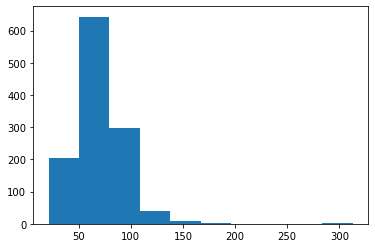

In [15]:
import matplotlib.pyplot as plt
print(houses.LotFrontage.unique())
plt.hist(houses.LotFrontage)


In [16]:
houses.LotFrontage.quantile(.25)
LF_fill = houses.LotFrontage.mode()
houses.LotFrontage.fillna(houses.LotFrontage.mode()[0], inplace=True)

In [17]:
houses.LotFrontage.astype(int)

0       65
1       80
2       68
3       60
4       84
        ..
1455    62
1456    85
1457    66
1458    68
1459    75
Name: LotFrontage, Length: 1460, dtype: int64

In [18]:

test.LotFrontage.fillna(houses.LotFrontage.mode()[0], inplace=True)
test.LotFrontage.astype(int)

0        80
1        81
2        74
3        78
4        43
       ... 
1454     21
1455     21
1456    160
1457     62
1458     74
Name: LotFrontage, Length: 1459, dtype: int64

In [19]:
houses.Alley.unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [20]:
#we'll use get_dummies at the end -nan values will just be 0's then

In [21]:
print(houses.MasVnrType.unique())
print(houses.MasVnrType.value_counts())
houses.MasVnrType.fillna(houses.MasVnrType.mode()[0], inplace=True)

['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [22]:
#repeat on test
test.MasVnrType.fillna(houses.MasVnrType.mode()[0], inplace=True)

In [23]:
print(houses.MasVnrArea.describe())
print(houses.MasVnrArea.unique())
houses.MasVnrArea.fillna(0, inplace=True)
#repeat on test
test.MasVnrArea.fillna(0, inplace=True)
test.MasVnrArea.isnull().sum()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+

0

In [24]:
houses.BsmtExposure.unique()


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [25]:
# from data descripion: Gd-Good Exposure, Av-Average Exposure (split levels or foyers typically score average or above), 
#Mn-Mimimum Exposure, No-No Exposure, NA-No Basement
scale_BE = {np.nan: 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
houses['BsmtExposure'] = [scale_BE[item] for item in houses['BsmtExposure']]


In [26]:
#repeat on test
test['BsmtExposure'] = [scale_BE[item] for item in test['BsmtExposure']]

In [27]:
houses.BsmtExposure.unique()

array([1, 4, 2, 3, 0])

In [28]:
houses.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [29]:
scale_BT = {np.nan: 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
houses['BsmtFinType1'] = [scale_BT[item] for item in houses['BsmtFinType1']]

In [30]:
houses.BsmtFinType1.unique()

array([6, 5, 1, 3, 4, 0, 2])

In [31]:
#repeat on test
test['BsmtFinType1'] = [scale_BT[item] for item in test['BsmtFinType1']]

In [32]:
houses.BsmtFinType2.unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [33]:
houses['BsmtFinType2'] = [scale_BT[item] for item in houses['BsmtFinType2']]

In [34]:
#repeat on test
test['BsmtFinType2'] = [scale_BT[item] for item in test['BsmtFinType2']]

In [35]:
print(houses.Electrical.unique())
houses[houses.Electrical.isnull()]

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,5,2008,WD,Normal,167500


In [36]:
houses.dropna(subset= ['Electrical'], inplace=True)

In [37]:
houses[houses.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [38]:
#repeat on test
test.dropna(subset= ['Electrical'], inplace=True)

In [39]:
houses.GarageType.unique()
#will become 0 when get dummies

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [40]:
scaleGF ={np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
houses.GarageFinish = [scaleGF[item] for item in houses.GarageFinish]

In [41]:
test.GarageFinish = [scaleGF[item] for item in test.GarageFinish]

In [42]:
houses['GarageYrBlt'].isnull().sum()


81

In [43]:
#chose to fill in years with the year the house was built. This is when the decition to not build a garage was made.
houses.loc[houses['GarageYrBlt'].isnull(), 'GarageYrBlt'] = houses['YearBuilt'].loc[houses['GarageYrBlt'].isnull()]

In [44]:
houses['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1955., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1994., 1950., 1961., 1921.,
       1900., 1979., 1951., 1919., 1969., 1971., 1936., 1975., 1923.,
       1924., 1984., 1926., 1940., 1986., 1988., 1916., 1932., 1972.,
       1918., 1912., 1980., 1925., 1996., 1949., 1910., 1978., 1982.,
       1992., 1941., 1922., 2010., 1927., 1947., 1937., 1942., 1938.,
       1952., 1928., 1946., 1934., 1914., 1906., 1908., 1875., 1911.,
       1929., 1872., 1933.])

In [45]:
pd.to_numeric(houses['GarageYrBlt'], downcast='integer', errors='coerce')


0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: GarageYrBlt, Length: 1459, dtype: int16

In [46]:
test.loc[test['GarageYrBlt'].isnull(), 'GarageYrBlt'] = test['YearBuilt'].loc[test['GarageYrBlt'].isnull()]

In [47]:
houses.Fence.unique()
#get dummies

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [48]:
houses.MiscFeature.unique()
#get dummies

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

The rest of the missing values will become zeros when we use get dummies after a little EDA



In [49]:
houses.select_dtypes([np.number]).info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   ExterQual      1459 non-null   int64  
 10  ExterCond      1459 non-null   int64  
 11  BsmtQual       1459 non-null   int64  
 12  BsmtCond       1459 non-null   int64  
 13  BsmtExposure   1459 non-null   int64  
 14  BsmtFinType1   1459 non-null   int64  
 15  BsmtFinSF1     1459 non-null   int64  
 16  BsmtFinType2   1459 non-null   int64  
 17  BsmtFinSF2     1459 non-null   int64  
 18  BsmtUnfS

In [50]:
test.select_dtypes([np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   OverallQual    1459 non-null   int64  
 5   OverallCond    1459 non-null   int64  
 6   YearBuilt      1459 non-null   int64  
 7   YearRemodAdd   1459 non-null   int64  
 8   MasVnrArea     1459 non-null   float64
 9   ExterQual      1459 non-null   int64  
 10  ExterCond      1459 non-null   int64  
 11  BsmtQual       1459 non-null   int64  
 12  BsmtCond       1459 non-null   int64  
 13  BsmtExposure   1459 non-null   int64  
 14  BsmtFinType1   1459 non-null   int64  
 15  BsmtFinSF1     1458 non-null   float64
 16  BsmtFinType2   1459 non-null   int64  
 17  BsmtFinSF2     1458 non-null   float64
 18  BsmtUnfS

In [51]:
test[test.GarageCars.isnull()].iloc[:,45:65]

,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1116,0,1828,0.0,0.0,2,0,3,1,4,6,Typ,0,0,Detchd,1923.0,0,NaN,NaN,0,0


In [52]:
int0 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']

[test[column].fillna(0, inplace=True) for column in int0]


[None, None, None, None, None, None, None, None]

In [53]:
test[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageCars      0
GarageArea      0
dtype: int64

In [54]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC